# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Task 1
import pandas as pd

# Load the dataset
file_path = 'flight.csv'  # Replace with the actual file path
flight_data = pd.read_csv(file_path)

# Compute statistics for the 'coach_price' column
coach_price_stats = {
    'min': round(flight_data['coach_price'].min(), 2),
    'max': round(flight_data['coach_price'].max(), 2),
    'mean': round(flight_data['coach_price'].mean(), 2),
    'median': round(flight_data['coach_price'].median(), 2)
}

# Print the results
print(f"""Findings:
The coach ticket prices have the following statistics:
- Minimum price: ${coach_price_stats['min']}
- Maximum price: ${coach_price_stats['max']}
- Average price: ${coach_price_stats['mean']}
- Median price:  ${coach_price_stats['median']}

Assessment of $500:
A price of $500 is significantly above the average and median but still within the range of observed prices.
It would be considered expensive, particularly since the average price is around ${coach_price_stats['mean']}.

If budget is a concern, a price closer to the median (${coach_price_stats['median']}) or average would be more reasonable.
However, other factors (e.g., amenities, distance, or timing) may justify the higher price.
""")


Findings:
The coach ticket prices have the following statistics:
- Minimum price: $44.41
- Maximum price: $593.63
- Average price: $376.59
- Median price:  $380.56

Assessment of $500:
A price of $500 is significantly above the average and median but still within the range of observed prices.
It would be considered expensive, particularly since the average price is around $376.59.

If budget is a concern, a price closer to the median ($380.56) or average would be more reasonable.
However, other factors (e.g., amenities, distance, or timing) may justify the higher price.



2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

In [26]:
## Task 2
# Filter the data for flights that are exactly 8 hours long
eight_hour_flights = flight_data[flight_data['hours'] == 8]

# Compute statistics for the 'coach_price' column for 8-hour flights, rounded to 2 decimals
eight_hour_stats = {
    'min': round(eight_hour_flights['coach_price'].min(), 2),
    'max': round(eight_hour_flights['coach_price'].max(), 2),
    'mean': round(eight_hour_flights['coach_price'].mean(), 2),
    'median': round(eight_hour_flights['coach_price'].median(), 2)
}

# Print the findings
print(f"""Findings:
The coach ticket prices for 8-hour flights have the following statistics:
- Minimum price: ${eight_hour_stats['min']}
- Maximum price: ${eight_hour_stats['max']}
- Average price: ${eight_hour_stats['mean']}
- Median price:  ${eight_hour_stats['median']}

Assessment of $500:
A price of $500 is closer to the maximum and above the average price for 8-hour flights, making it more reasonable than before.
However, it is still somewhat expensive compared to the median price (${eight_hour_stats['median']}).

If budget is a concern, a price closer to the median (${eight_hour_stats['median']}) or average (${eight_hour_stats['mean']}) would be more appropriate.
""")


Findings:
The coach ticket prices for 8-hour flights have the following statistics:
- Minimum price: $170.77
- Maximum price: $593.63
- Average price: $431.83
- Median price:  $437.12

Assessment of $500:
A price of $500 is closer to the maximum and above the average price for 8-hour flights, making it more reasonable than before.
However, it is still somewhat expensive compared to the median price ($437.12).

If budget is a concern, a price closer to the median ($437.12) or average ($431.83) would be more appropriate.



3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

In [27]:
## Task 3
# Compute basic statistics for the 'delay' column
delay_stats = {
    'min': round(flight_data['delay'].min(), 2),
    'max': round(flight_data['delay'].max(), 2),
    'mean': round(flight_data['delay'].mean(), 2),
    'median': round(flight_data['delay'].median(), 2),
    'std_dev': round(flight_data['delay'].std(), 2)
}

# Create a delay distribution overview (grouped into bins)
delay_distribution = flight_data['delay'].value_counts(bins=10).sort_index()

# Categorize delays
def delay_cat(delay):
    if delay == 0:
        return 'No Delay'
    elif delay <= 30:
        return 'Short'
    elif 30 < delay <= 90:
        return 'Medium'
    else:
        return 'Long'

# Apply categorization to the 'delay' column
flight_data['delay_type'] = flight_data['delay'].apply(delay_cat)

# Count the number of flights in each delay category
delay_category_counts = flight_data['delay_type'].value_counts()

# Calculate total number of flights
total_flights = len(flight_data)

# Print delay statistics
print(f"""Flight Delay Statistics:
- Minimum delay: {delay_stats['min']} minutes
- Maximum delay: {delay_stats['max']} minutes
- Average delay: {delay_stats['mean']} minutes
- Median delay: {delay_stats['median']} minutes
- Standard deviation of delays: {delay_stats['std_dev']} minutes
""")

# Print the Delay Categories and their counts:
print(f"""Flight Delay Categories:
- No Delay  {delay_category_counts.get('No Delay', 0)} ({round((delay_category_counts.get('No Delay', 0) / total_flights) * 100, 2)}%)
- Short     {delay_category_counts.get('Short', 0)} ({round((delay_category_counts.get('Short', 0) / total_flights) * 100, 2)}%)
- Medium    {delay_category_counts.get('Medium', 0)} ({round((delay_category_counts.get('Medium', 0) / total_flights) * 100, 2)}%)
- Long      {delay_category_counts.get('Long', 0)} ({round((delay_category_counts.get('Long', 0) / total_flights) * 100, 2)}%)
""")

# Print findings
print(f"""Findings:
      In short, flight delays are typically short (0–30 minutes) and occur most often. 
      These delays are unlikely to impact connecting flights significantly. 
      
      Medium delays (30–90 minutes) are less common but still pose a risk for tight connections. 
      
      Long delays (90+ minutes) are rare but can cause passengers to miss connecting flights.
      
      For connecting flights, it's advisable to allow 1–2 hours of buffer time to minimize the risk of missing a connection, 
      especially when medium or long delays occur.""")

Flight Delay Statistics:
- Minimum delay: 0 minutes
- Maximum delay: 1560 minutes
- Average delay: 13.16 minutes
- Median delay: 10.0 minutes
- Standard deviation of delays: 41.94 minutes

Flight Delay Categories:
- No Delay  10139 (7.81%)
- Short     113549 (87.49%)
- Medium    5992 (4.62%)
- Long      100 (0.08%)

Findings:
      In short, flight delays are typically short (0–30 minutes) and occur most often. 
      These delays are unlikely to impact connecting flights significantly. 
      
      Medium delays (30–90 minutes) are less common but still pose a risk for tight connections. 
      
      Long delays (90+ minutes) are rare but can cause passengers to miss connecting flights.
      
      For connecting flights, it's advisable to allow 1–2 hours of buffer time to minimize the risk of missing a connection, 
      especially when medium or long delays occur.


## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

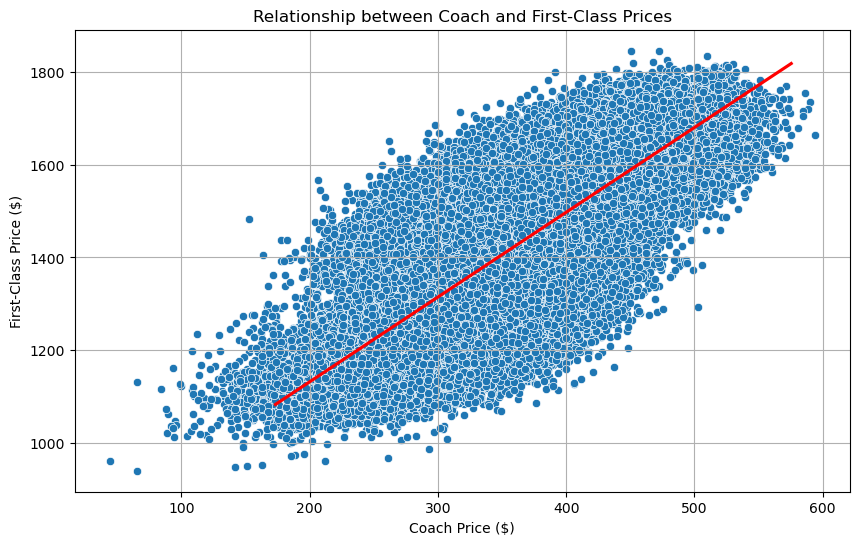

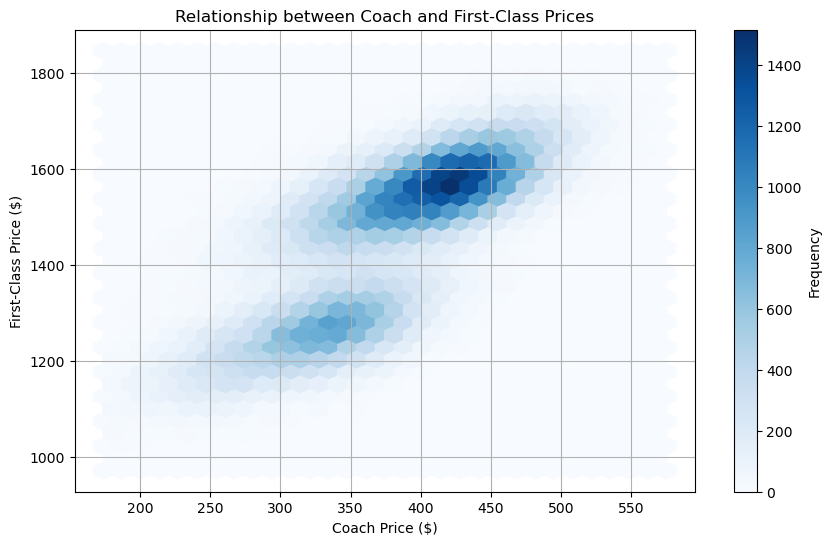

In [31]:
## Task 4
# Create a scatter plot to show the relationship between coach and first-class prices

coach_price_mean = flight_data['coach_price'].mean()
coach_price_std = flight_data['coach_price'].std()

first_class_price_mean = flight_data['firstclass_price'].mean()
first_class_price_std = flight_data['firstclass_price'].std()

filtered_data = flight_data[
    (flight_data['coach_price'] < coach_price_mean + 3 * coach_price_std) &
    (flight_data['coach_price'] > coach_price_mean - 3 * coach_price_std) &
    (flight_data['firstclass_price'] < first_class_price_mean + 3 * first_class_price_std) &
    (flight_data['firstclass_price'] > first_class_price_mean - 3 * first_class_price_std)
]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=flight_data['coach_price'], y=flight_data['firstclass_price'])
sns.regplot(x='coach_price', y='firstclass_price', data=filtered_data, scatter=False, color='red')


# Adding labels and title
plt.title('Relationship between Coach and First-Class Prices')
plt.xlabel('Coach Price ($)')
plt.ylabel('First-Class Price ($)')
plt.grid(True)

# Hexbin plot for better visualization of dense areas
plt.figure(figsize=(10, 6))
plt.hexbin(filtered_data['coach_price'], filtered_data['firstclass_price'], gridsize=30, cmap='Blues')

# Adding labels and title
plt.title('Relationship between Coach and First-Class Prices')
plt.xlabel('Coach Price ($)')
plt.ylabel('First-Class Price ($)')
plt.colorbar(label='Frequency')
plt.grid(True)

# Show the plot
plt.show()


# Show the plot
plt.show()



5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

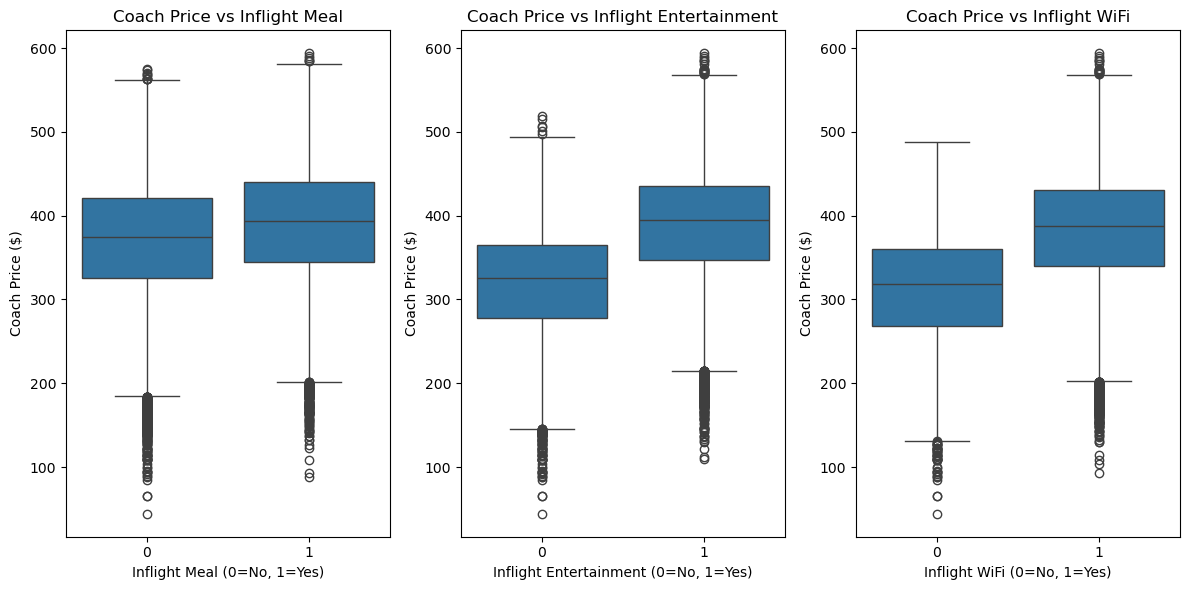

In [32]:
## Task 5

# Ensure that the inflight features are binary (0 or 1) or categorical (Yes/No)
# If the columns are strings like 'Yes'/'No', convert to binary (1/0) for easier comparison
flight_data['inflight_meal'] = flight_data['inflight_meal'].map({'Yes': 1, 'No': 0})
flight_data['inflight_entertainment'] = flight_data['inflight_entertainment'].map({'Yes': 1, 'No': 0})
flight_data['inflight_wifi'] = flight_data['inflight_wifi'].map({'Yes': 1, 'No': 0})

# Group the data by inflight features and calculate the average coach price
feature_price = flight_data.groupby(
    ['inflight_meal', 'inflight_entertainment', 'inflight_wifi']
)['coach_price'].mean().reset_index()

# Plot the relationship between inflight features and coach price using a boxplot
plt.figure(figsize=(12, 6))

# Boxplot for coach price by meal feature
plt.subplot(1, 3, 1)
sns.boxplot(x='inflight_meal', y='coach_price', data=flight_data)
plt.title('Coach Price vs Inflight Meal')
plt.xlabel('Inflight Meal (0=No, 1=Yes)')
plt.ylabel('Coach Price ($)')

# Boxplot for coach price by entertainment feature
plt.subplot(1, 3, 2)
sns.boxplot(x='inflight_entertainment', y='coach_price', data=flight_data)
plt.title('Coach Price vs Inflight Entertainment')
plt.xlabel('Inflight Entertainment (0=No, 1=Yes)')
plt.ylabel('Coach Price ($)')

# Boxplot for coach price by wifi feature
plt.subplot(1, 3, 3)
sns.boxplot(x='inflight_wifi', y='coach_price', data=flight_data)
plt.title('Coach Price vs Inflight WiFi')
plt.xlabel('Inflight WiFi (0=No, 1=Yes)')
plt.ylabel('Coach Price ($)')

plt.tight_layout()
plt.show()


In [35]:
# Print the average price for each inflight feature combination in a readable format
print(f"{'Meal':^15}{'Entertainment':^25}{'WiFi':^15}{'Average Coach Price ($)':^25}")
print("-" * 80)

avg_price_by_feature = feature_price.groupby(
    ['inflight_meal', 'inflight_entertainment', 'inflight_wifi']
)['coach_price'].mean().reset_index()

for index, row in avg_price_by_feature.iterrows():
    inflight_meal = 'Yes' if row['inflight_meal'] == 1 else 'No'
    inflight_entertainment = 'Yes' if row['inflight_entertainment'] == 1 else 'No'
    inflight_wifi = 'Yes' if row['inflight_wifi'] == 1 else 'No'
    avg_price = row['coach_price']
    
    # Print the results in a structured format
    print(f"{inflight_meal:^15}{inflight_entertainment:^25}{inflight_wifi:^15}{avg_price:^25.2f}")
   
print(f"""
      
Conclusion:

The Inflight Meal has the most significant effect on the ticket price when added, followed by Inflight Entertainment.
Inflight WiFi contributes to a more modest increase in price.
Flights without features (meal, entertainment, or WiFi) are generally cheaper. """)

     Meal            Entertainment           WiFi       Average Coach Price ($) 
--------------------------------------------------------------------------------
      No                  No                  No                252.17          
      No                  No                  Yes               321.98          
      No                  Yes                 No                321.24          
      No                  Yes                 Yes               391.76          
      Yes                 No                  No                270.32          
      Yes                 No                  Yes               340.32          
      Yes                 Yes                 No                340.07          
      Yes                 Yes                 Yes               411.08          

      
Conclusion:

The Inflight Meal has the most significant effect on the ticket price when added, followed by Inflight Entertainment.
Inflight WiFi contributes to a more modest increase

6. How does the number of passengers change in relation to the length of flights?

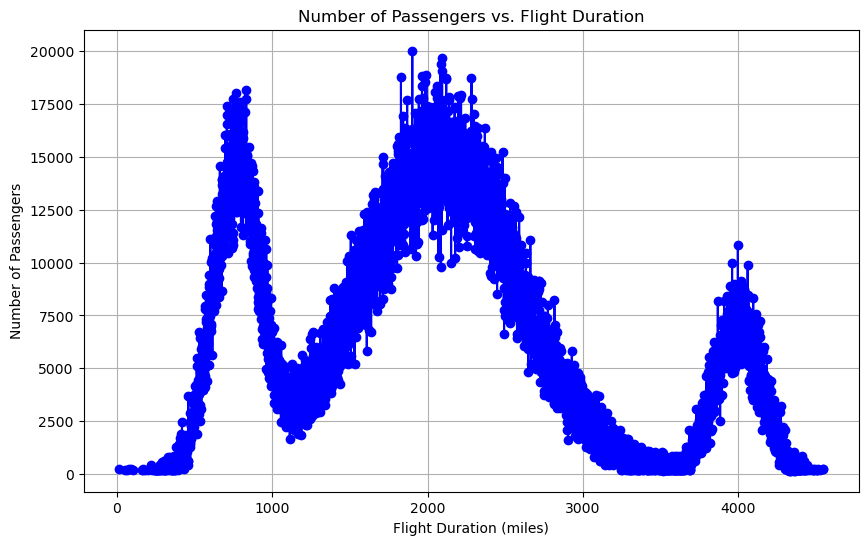

In [36]:
## Task 6
# Group data by flight duration and calculate the total number of passengers for each group
flight_duration_passengers = flight_data.groupby('miles')['passengers'].sum().reset_index()

# Plot the relationship
plt.figure(figsize=(10, 6))
plt.plot(flight_duration_passengers['miles'], flight_duration_passengers['passengers'], marker='o', linestyle='-', color='b')

plt.title('Number of Passengers vs. Flight Duration')
plt.xlabel('Flight Duration (miles)')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()


### Findings:
Longer Flights: We observe that longer flights tend to have more passengers, as they could be for popular destinations or international routes.

Shorter Flights: Shorter flights have fewer passengers, especially if they are regional or less crowded routes.

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

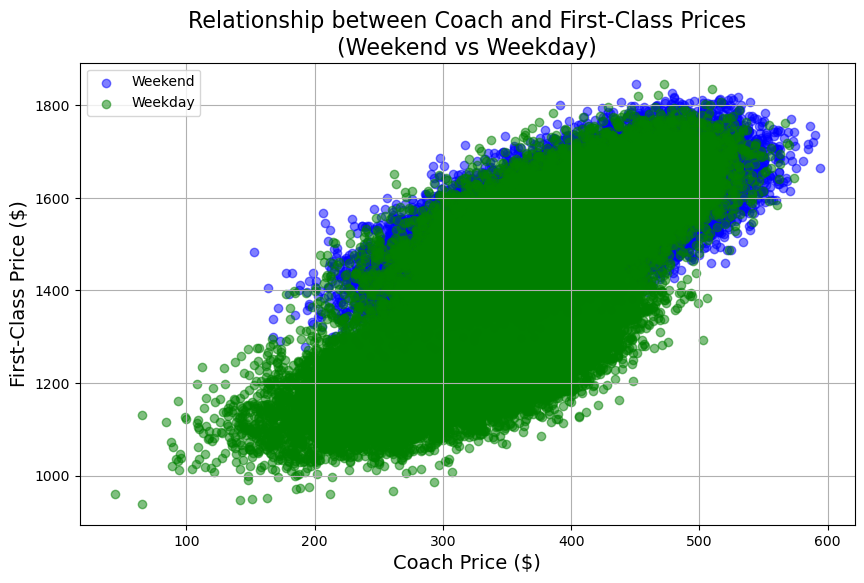

In [37]:
## Task 7
# Create a new column that categorizes whether the flight was on a weekend or a weekday
flight_data['weekend'] = flight_data['day_of_week'].apply(lambda x: 'Weekend' if x in ['Sunday', 'Saturday'] else 'Weekday')


# Plotting
plt.figure(figsize=(10, 6))

# Plot for weekend flights (blue color)
plt.scatter(weekend_data['coach_price'], weekend_data['firstclass_price'], color='b', label='Weekend', alpha=0.5)

# Plot for weekday flights (green color)
plt.scatter(weekday_data['coach_price'], weekday_data['firstclass_price'], color='g', label='Weekday', alpha=0.5)

# Add labels and title
plt.title('Relationship between Coach and First-Class Prices\n(Weekend vs Weekday)', fontsize=16)
plt.xlabel('Coach Price ($)', fontsize=14)
plt.ylabel('First-Class Price ($)', fontsize=14)

# Show legend
plt.legend()

# Show grid and plot
plt.grid(True)
plt.show()

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

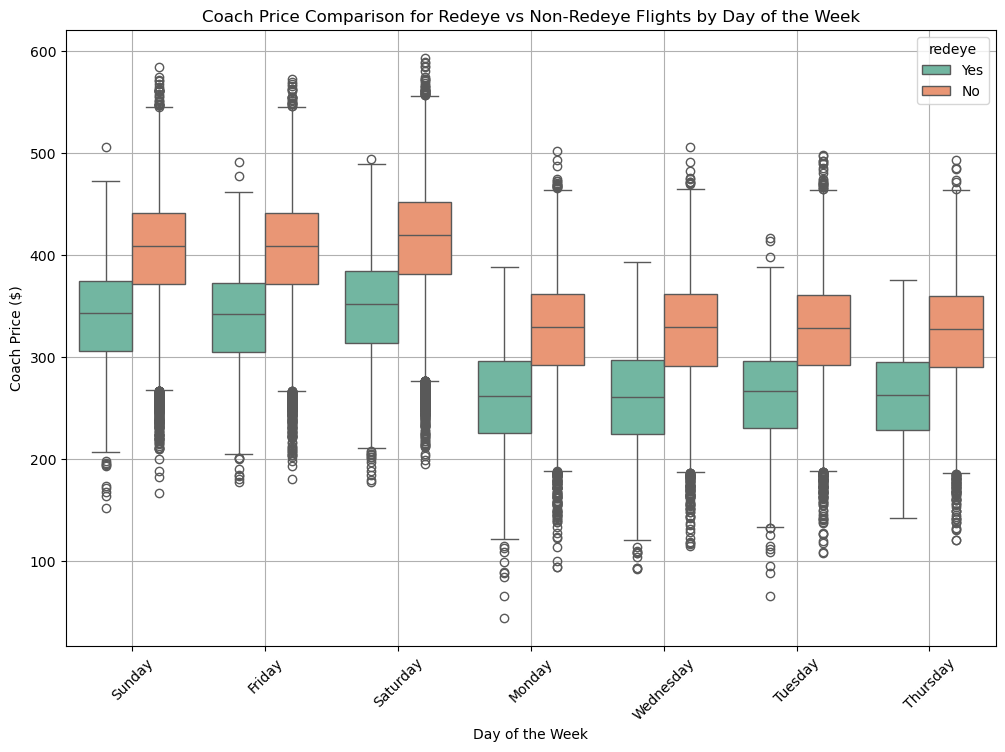

In [48]:
## Task 8

# Group by day of the week and redeye status (Yes/No) and calculate average coach prices
avg_coach_price_by_day_redeye = flight_data.groupby(['day_of_week', 'redeye'])['coach_price'].mean().reset_index()

# Visualize with a boxplot for coach prices by day of the week and redeye status
plt.figure(figsize=(12, 8))

# Create the boxplot
ax = sns.boxplot(x='day_of_week', y='coach_price', hue='redeye', data=flight_data, palette='Set2')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('Coach Price Comparison for Redeye vs Non-Redeye Flights by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Coach Price ($)')

# Show grid and plot
plt.grid(True)
plt.show()